In [113]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
from juanfit import gaussian
import cmcrameri.cm as cmcm
import sumerpy
importlib.reload(sumerpy)
from sumerpy import con_width_funct_4

In [81]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_338 = np.linspace(0,1023,1024)*0.04496629878144223 + 671.7967194748996
sumer_338_window = sumer_img[:,:1024]
sumer_338_window.shape
sumer_ycen = 1119.81
sumer_ycoord = np.linspace(sumer_ycen-299.2/2,sumer_ycen+299.2/2,300) - 5
np.set_printoptions(precision=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


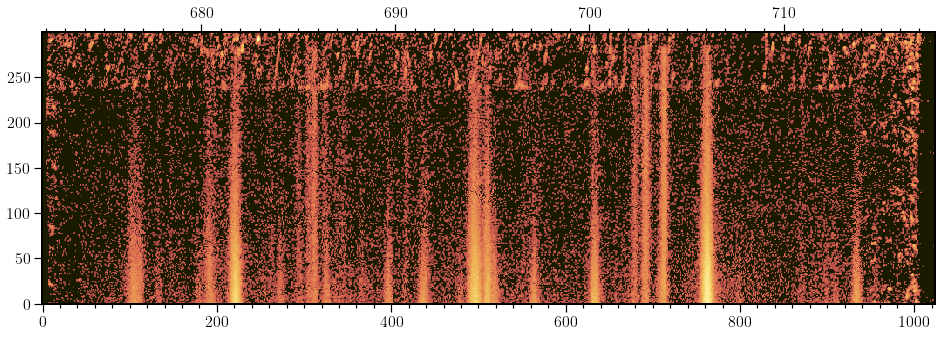

In [3]:
fig, ax = plt.subplots(figsize=(16,5))
ax.pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_338_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl_338[0],wvl_338[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)

FWHM after removing instrumental broadening:  [271.31]


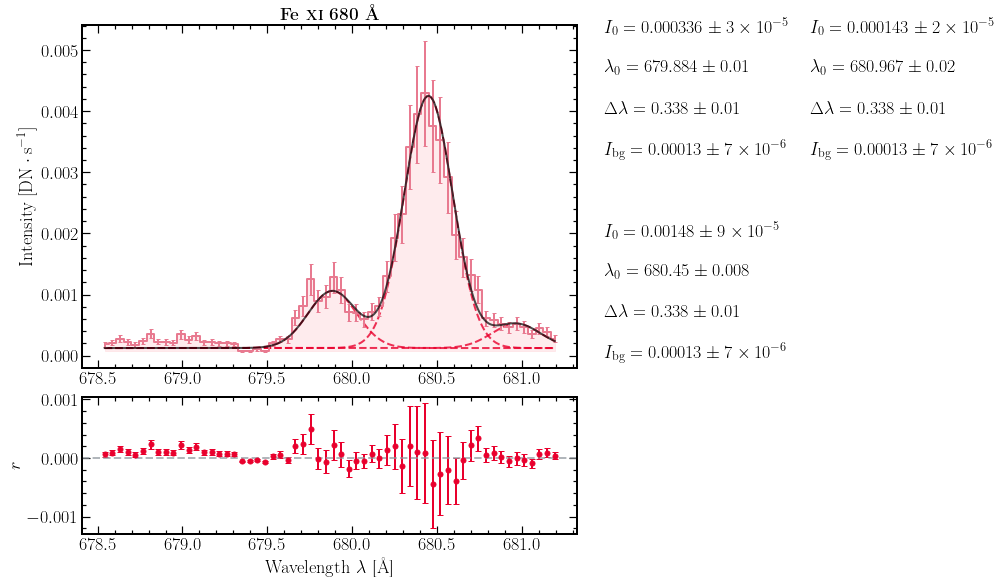

In [49]:
FeXI_680_slice = (150,210)
wvl_FeXI_680 = wvl_338[FeXI_680_slice[0]:FeXI_680_slice[1]]
int_FeXI_680 = np.average(sumer_338_window[-30:,FeXI_680_slice[0]:FeXI_680_slice[1]],axis=0)

FeXI_680_fit_model = SpectrumFitSingle(data=int_FeXI_680,wvl=wvl_FeXI_680,err=None,
                                      same_width=True,line_number=3,line_wvl_init=[679.7,680.4,680.6],
                                      int_max_init=[0.001,0.004,0.0005],fwhm_init=[0.2],err_percent=20)

FeXI_680_fit_model.run_lse()
FeXI_680_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 680 \mbox{\AA}}",
                       xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeXI_680_fit_model.line_wvl_fit[1],1,FeXI_680_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [238.19 269.14]


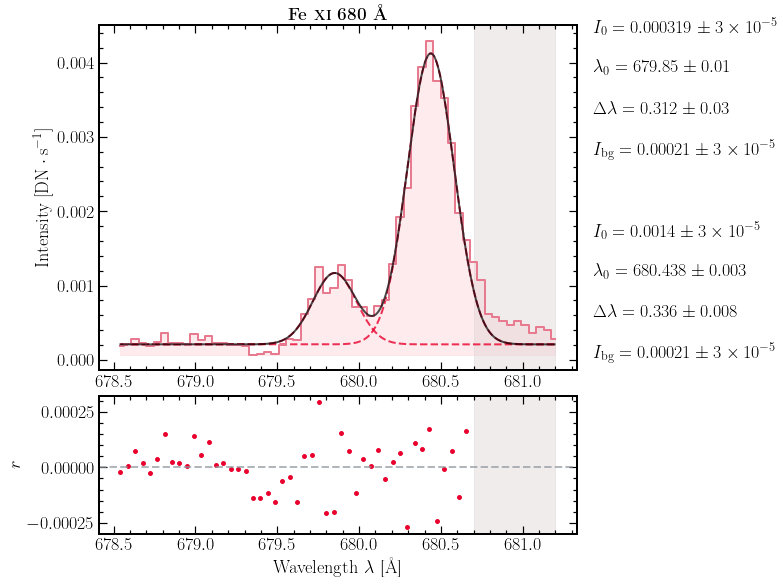

In [51]:
FeXI_680_slice = (150,210)
wvl_FeXI_680 = wvl_338[FeXI_680_slice[0]:FeXI_680_slice[1]]
int_FeXI_680 = np.average(sumer_338_window[-30:,FeXI_680_slice[0]:FeXI_680_slice[1]],axis=0)

FeXI_680_fit_model = SpectrumFitSingle(data=int_FeXI_680,wvl=wvl_FeXI_680,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[679.7,680.4],
                                      int_max_init=[0.001,0.004],fwhm_init=[0.2,0.2],mask=[[680.7,681.2]])

FeXI_680_fit_model.run_lse()
FeXI_680_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 680 \mbox{\AA}}",
                       xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeXI_680_fit_model.line_wvl_fit,1,FeXI_680_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [218.83]


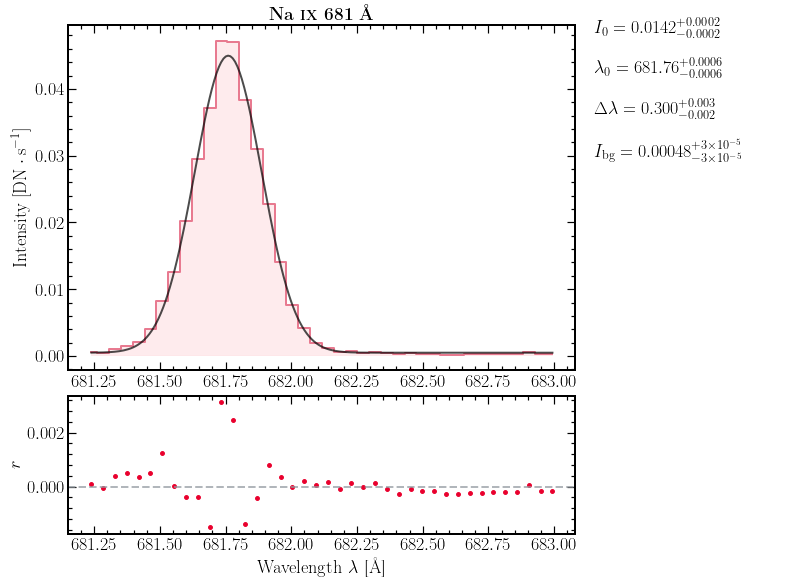

In [52]:
NaIX_681_slice = (210,250)
wvl_NaIX_681 = wvl_338[NaIX_681_slice[0]:NaIX_681_slice[1]]
int_NaIX_681 = np.average(sumer_338_window[-30:,NaIX_681_slice[0]:NaIX_681_slice[1]],axis=0)

NaIX_681_fit_model = SpectrumFitSingle(data=int_NaIX_681,wvl=wvl_NaIX_681,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[681.8],
                                      int_max_init=[0.04],fwhm_init=[0.2])
#NaIX_681_fit_model.plot(plot_fit=False,plot_params=False)
NaIX_681_fit_model.run_HahnMC(n_chain=10000)
NaIX_681_fit_model.plot(plot_title=r"\textbf{Na \textsc{ix} 681 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NaIX_681_fit_model.line_wvl_fit,1,NaIX_681_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [217.13]


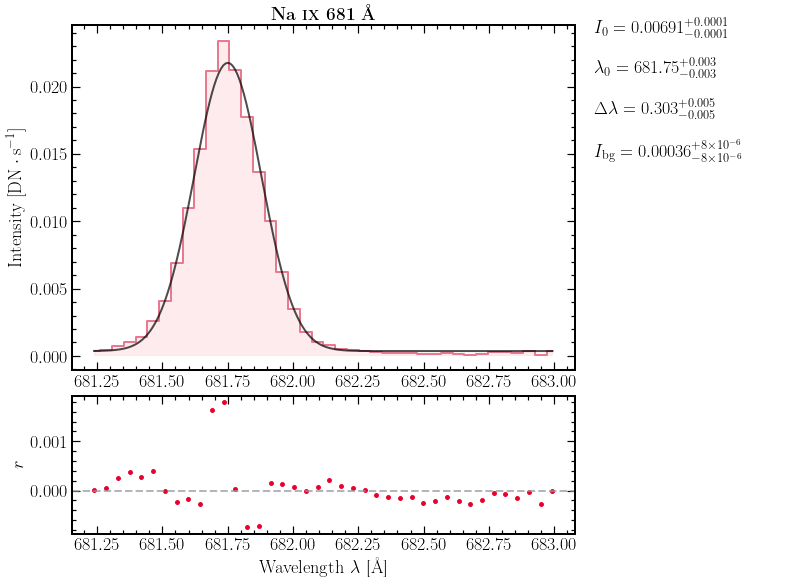

In [79]:
NaIX_681_slice = (210,250)
wvl_NaIX_681 = wvl_338[NaIX_681_slice[0]:NaIX_681_slice[1]]
int_NaIX_681 = np.average(sumer_338_window[-60:-30,NaIX_681_slice[0]:NaIX_681_slice[1]],axis=0)

NaIX_681_fit_model = SpectrumFitSingle(data=int_NaIX_681,wvl=wvl_NaIX_681,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[681.8],
                                      int_max_init=[0.04],fwhm_init=[0.2])
#NaIX_681_fit_model.plot(plot_fit=False,plot_params=False)
NaIX_681_fit_model.run_HahnMC(n_chain=10000)
NaIX_681_fit_model.plot(plot_title=r"\textbf{Na \textsc{ix} 681 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NaIX_681_fit_model.line_wvl_fit,1,NaIX_681_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


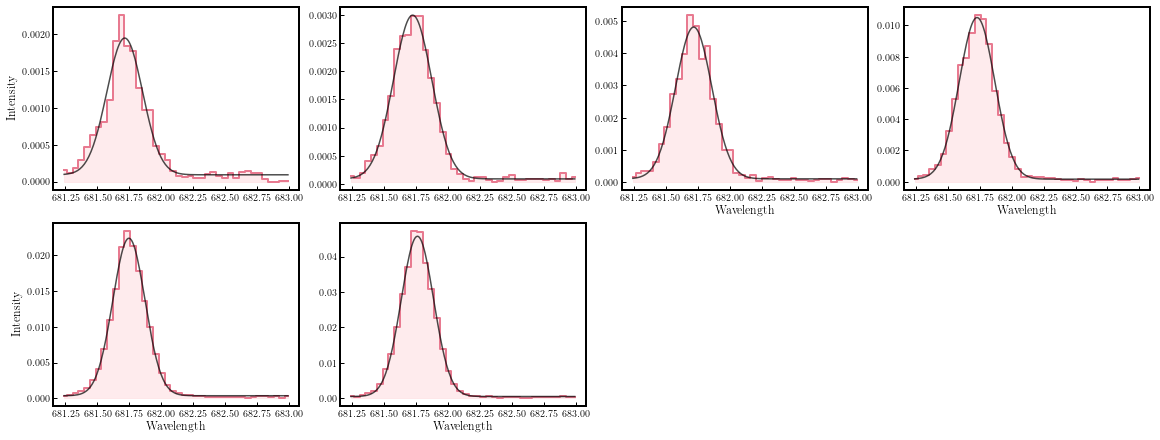

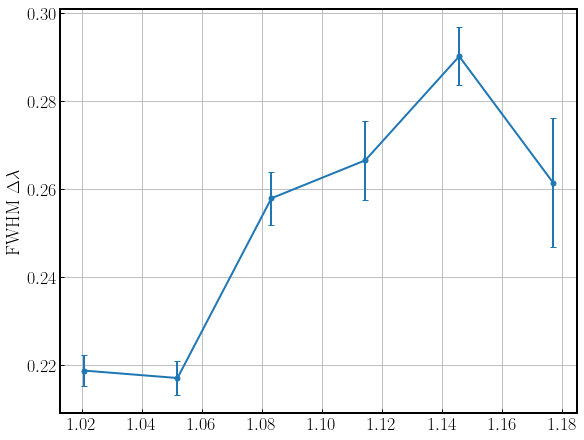

In [114]:
int_NaIX_681_row = np.average(sumer_338_window[-180:,NaIX_681_slice[0]:NaIX_681_slice[1]].reshape(-1,30,NaIX_681_slice[1]-NaIX_681_slice[0]),axis=1)

NaIX_681_fit_row_model = SpectrumFitRow(data=int_NaIX_681_row,wvl=wvl_NaIX_681,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[681.8],
                                      int_max_init=[0.04],fwhm_init=[0.2])
NaIX_681_fit_row_model.run_lse()
NaIX_681_fit_row_model.plot_fit()
NaIX_681_fit_row_model.fwhm_fit = con_width_funct_4(1,NaIX_681_fit_row_model.line_wvl_fit,1, NaIX_681_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = NaIX_681_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:180].reshape(-1,30),axis=1))/960)
ax.grid("on")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [195.46]


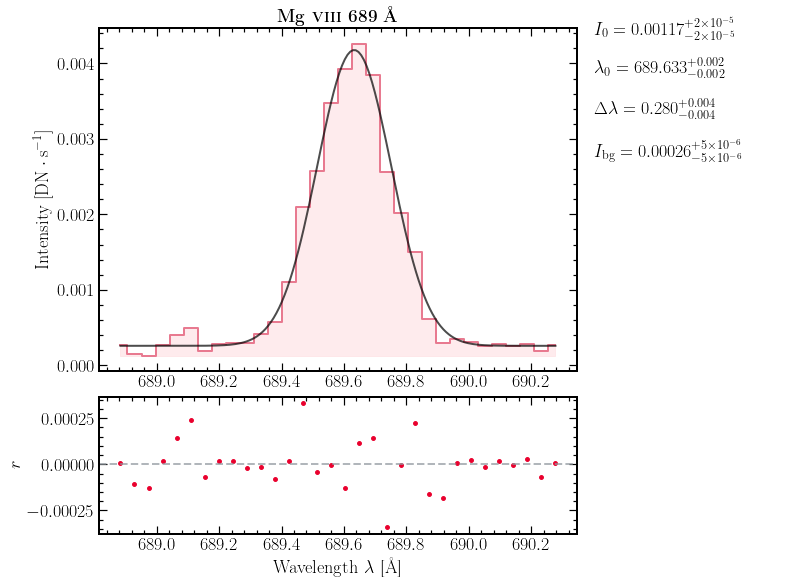

In [53]:
MgVIII_689_slice = (380,412)
wvl_MgVIII_689 = wvl_338[MgVIII_689_slice[0]:MgVIII_689_slice[1]]
int_MgVIII_689 = np.average(sumer_338_window[-30:,MgVIII_689_slice[0]:MgVIII_689_slice[1]],axis=0)

MgVIII_689_fit_model = SpectrumFitSingle(data=int_MgVIII_689,wvl=wvl_MgVIII_689,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[689.7],
                                      int_max_init=[0.004],fwhm_init=[0.2])
#MgVIII_689_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_689_fit_model.run_HahnMC(n_chain=10000)
MgVIII_689_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 689 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_689_fit_model.line_wvl_fit,1,MgVIII_689_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [240.79]


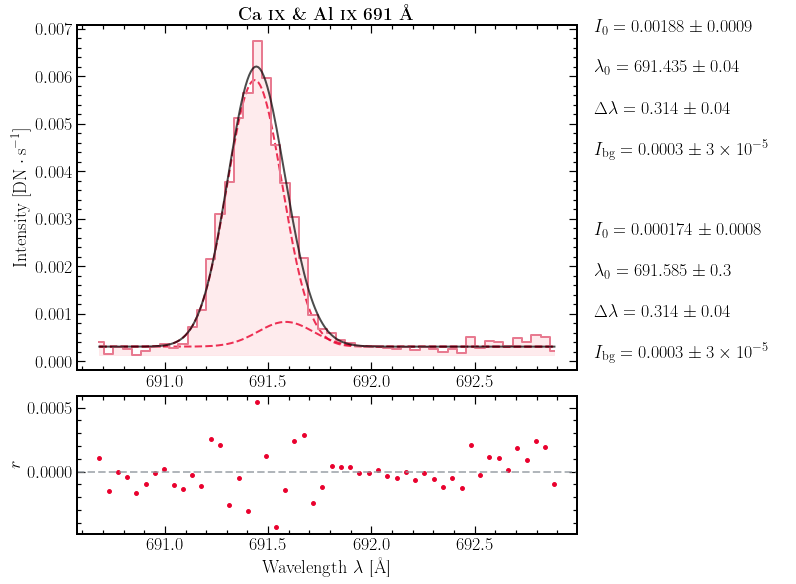

In [115]:
CaIX_AlIX_691_slice = (420,470)
wvl_CaIX_AlIX_691 = wvl_338[CaIX_AlIX_691_slice[0]:CaIX_AlIX_691_slice[1]]
int_CaIX_AlIX_691 = np.average(sumer_338_window[-30:,CaIX_AlIX_691_slice[0]:CaIX_AlIX_691_slice[1]],axis=0)

CaIX_AlIX_691_fit_model = SpectrumFitSingle(data=int_CaIX_AlIX_691,wvl=wvl_CaIX_AlIX_691,err=None,
                                      same_width=True,line_number=2,line_wvl_init=[691.4,691.6],
                                      int_max_init=[0.006,0.002],fwhm_init=[0.2])
#CaIX_AlIX_691_fit_model.plot(plot_fit=False,plot_params=False)
CaIX_AlIX_691_fit_model.run_lse()
CaIX_AlIX_691_fit_model.plot(plot_title=r"\textbf{Ca \textsc{ix} \& Al \textsc{ix} 691 \mbox{\AA}}",
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
#CaIX_AlIX_691_fit_model.run_HahnMC(n_chain=10000)
#CaIX_AlIX_691_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 689 \mbox{\AA}}",plot_hmc=True,
#                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
#                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,CaIX_AlIX_691_fit_model.line_wvl_fit[0],1,CaIX_AlIX_691_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [118.19 266.53 160.49 183.62]


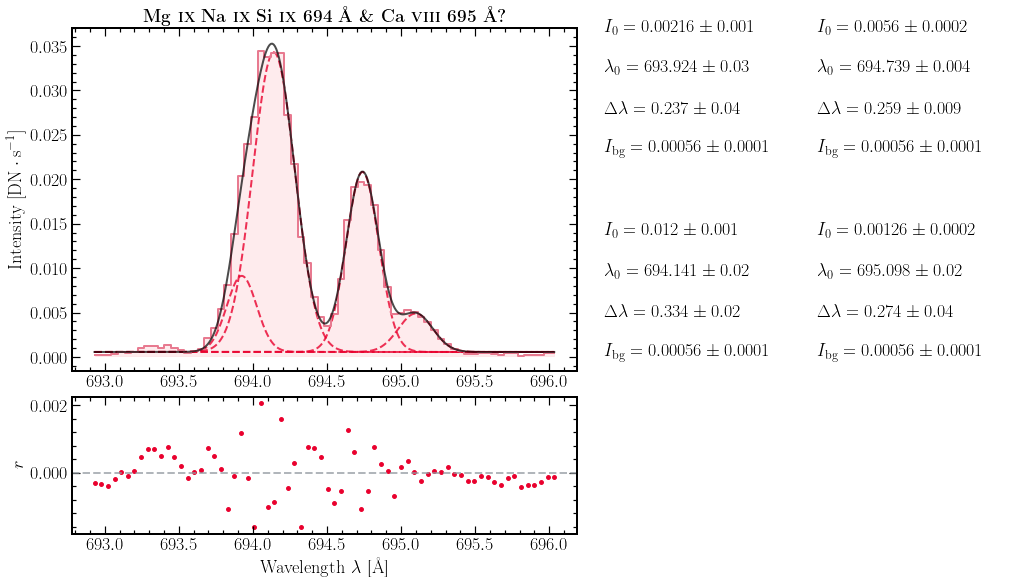

In [57]:
MgIX_NaIX_SiIX_694_slice = (470,540)
wvl_MgIX_NaIX_SiIX_694 = wvl_338[MgIX_NaIX_SiIX_694_slice[0]:MgIX_NaIX_SiIX_694_slice[1]]
int_MgIX_NaIX_SiIX_694 = np.average(sumer_338_window[-30:,MgIX_NaIX_SiIX_694_slice[0]:MgIX_NaIX_SiIX_694_slice[1]],axis=0)

MgIX_NaIX_SiIX_694_fit_model = SpectrumFitSingle(data=int_MgIX_NaIX_SiIX_694,wvl=wvl_MgIX_NaIX_SiIX_694,err=None,
                                      same_width=False,line_number=4,line_wvl_init=[693.9,694.1,694.7,695.1],
                                      int_max_init=[0.01,0.03,0.02,0.005],fwhm_init=[0.2,0.3,0.2,0.3])
#MgIX_NaIX_SiIX_694_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_NaIX_SiIX_694_fit_model.run_lse()
MgIX_NaIX_SiIX_694_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} Na \textsc{ix} Si \textsc{ix} 694 \mbox{\AA} \& Ca \textsc{viii} 695 \mbox{\AA}?}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgIX_NaIX_SiIX_694_fit_model.line_wvl_fit,1,MgIX_NaIX_SiIX_694_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [179.99]


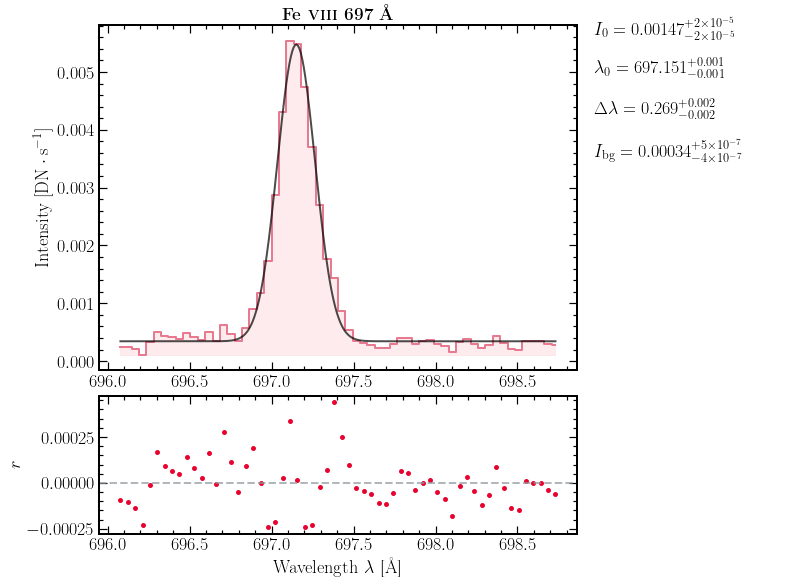

In [58]:
FeVIII_697_slice = (540,600)
wvl_FeVIII_697 = wvl_338[FeVIII_697_slice[0]:FeVIII_697_slice[1]]
int_FeVIII_697 = np.average(sumer_338_window[-30:,FeVIII_697_slice[0]:FeVIII_697_slice[1]],axis=0)

FeVIII_697_fit_model = SpectrumFitSingle(data=int_FeVIII_697,wvl=wvl_FeVIII_697,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[697.1],
                                      int_max_init=[0.004],fwhm_init=[0.2])
#FeVIII_697_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_697_fit_model.run_HahnMC(n_chain=10000)
FeVIII_697_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 697 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeVIII_697_fit_model.line_wvl_fit,1,FeVIII_697_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [251.9]


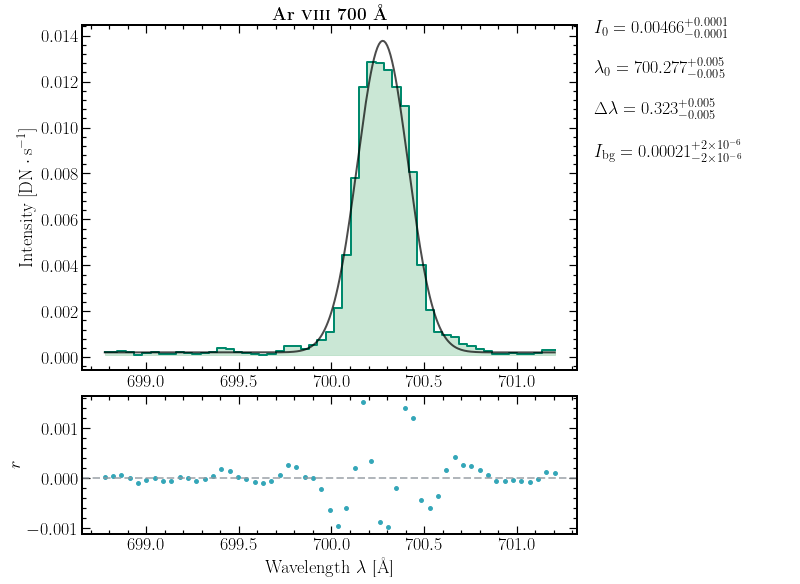

In [59]:
ArVIII_700_slice = (600,655)
wvl_ArVIII_700 = wvl_338[ArVIII_700_slice[0]:ArVIII_700_slice[1]]
int_ArVIII_700 = np.average(sumer_338_window[-30:,ArVIII_700_slice[0]:ArVIII_700_slice[1]],axis=0)

ArVIII_700_fit_model = SpectrumFitSingle(data=int_ArVIII_700,wvl=wvl_ArVIII_700,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[700.2],
                                      int_max_init=[0.012],fwhm_init=[0.2])
#ArVIII_700_fit_model.plot(plot_fit=False,plot_params=False)
ArVIII_700_fit_model.run_HahnMC(n_chain=10000,ignore_err=False)
ArVIII_700_fit_model.plot(plot_title=r"\textbf{Ar \textsc{viii} 700 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                         color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,ArVIII_700_fit_model.line_wvl_fit,1,ArVIII_700_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [183.02 180.66 290.19   0.  ]


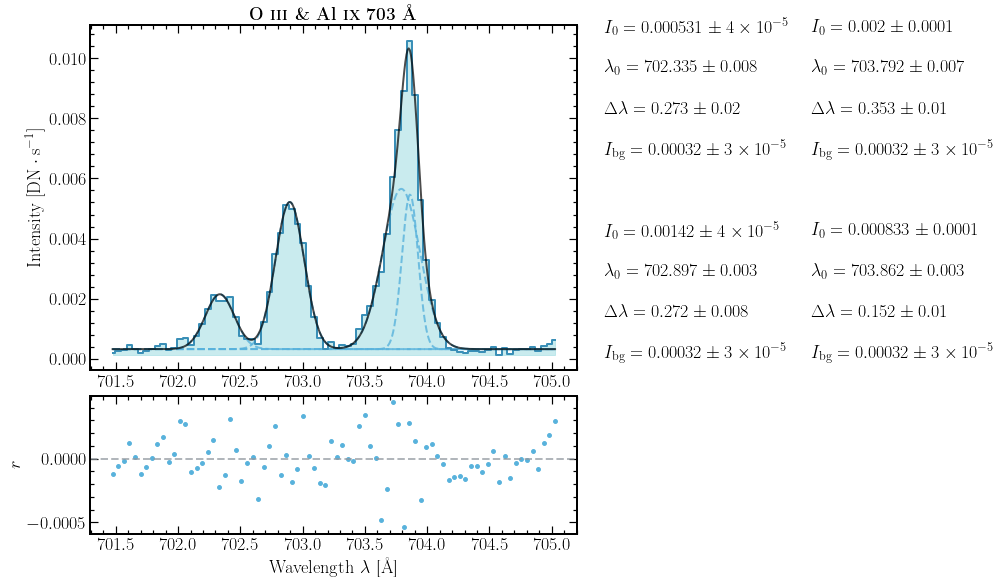

In [116]:
OIII_AlIX_slice = (660,740)
wvl_OIII_AlIX = wvl_338[OIII_AlIX_slice[0]:OIII_AlIX_slice[1]]
int_OIII_AlIX = np.average(sumer_338_window[-30:,OIII_AlIX_slice[0]:OIII_AlIX_slice[1]],axis=0)

OIII_AlIX_fit_model = SpectrumFitSingle(data=int_OIII_AlIX,wvl=wvl_OIII_AlIX,err=None,
                                      same_width=False,line_number=4,line_wvl_init=[702.2,702.9,703.5,703.8],
                                      int_max_init=[0.002,0.005,0.003,0.01],fwhm_init=[0.2,0.2,0.3,0.2])
#OIII_AlIX_fit_model.plot(plot_fit=False,plot_params=False)
OIII_AlIX_fit_model.run_lse()
OIII_AlIX_fit_model.plot(plot_title=r"\textbf{O \textsc{iii} \& Al \textsc{ix} 703 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                                color_style="Blue")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OIII_AlIX_fit_model.line_wvl_fit,1,OIII_AlIX_fit_model.fwhm_fit*1000,DET_B=True))

FWHM after removing instrumental broadening:  [162.49 162.49   0.   162.49]


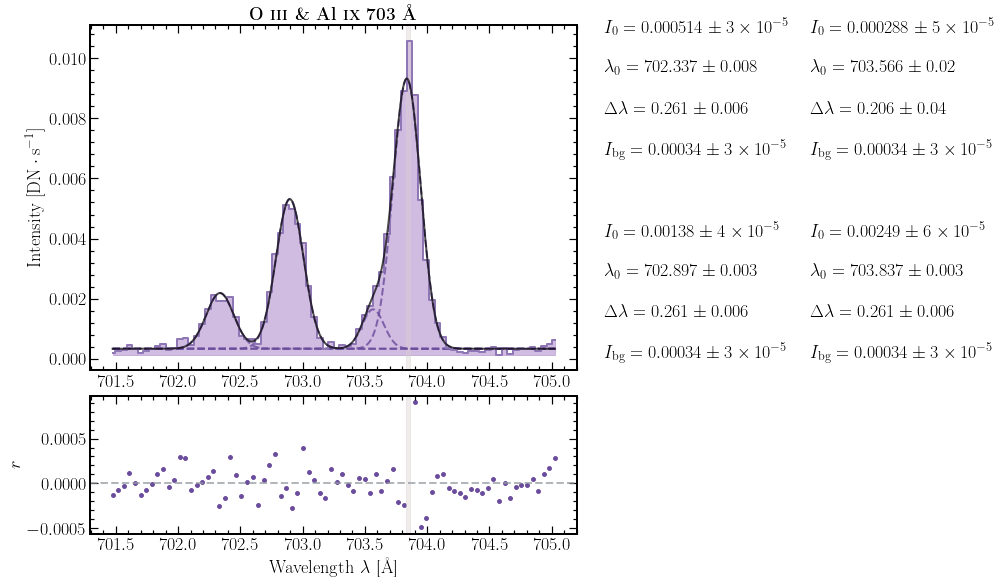

In [117]:
OIII_AlIX_slice = (660,740)
wvl_OIII_AlIX = wvl_338[OIII_AlIX_slice[0]:OIII_AlIX_slice[1]]
int_OIII_AlIX = np.average(sumer_338_window[-30:,OIII_AlIX_slice[0]:OIII_AlIX_slice[1]],axis=0)

OIII_AlIX_fit_model = SpectrumFitSingle(data=int_OIII_AlIX,wvl=wvl_OIII_AlIX,err=None,
                                      same_width=[True,True,False,True],line_number=4,line_wvl_init=[702.2,702.9,703.5,703.9],
                                      int_max_init=[0.002,0.005,0.003,0.01],fwhm_init=[0.2,0.2,0.2,0.2],mask=[[703.83,703.86]])
#OIII_AlIX_fit_model.plot(plot_fit=False,plot_params=False)
OIII_AlIX_fit_model.run_lse(absolute_sigma=False)
OIII_AlIX_fit_model.plot(plot_title=r"\textbf{O \textsc{iii} \& Al \textsc{ix} 703 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                                color_style="Purple")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OIII_AlIX_fit_model.line_wvl_fit,1,OIII_AlIX_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:448: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


FWHM after removing instrumental broadening:  [121.14 180.98 200.32 121.14]


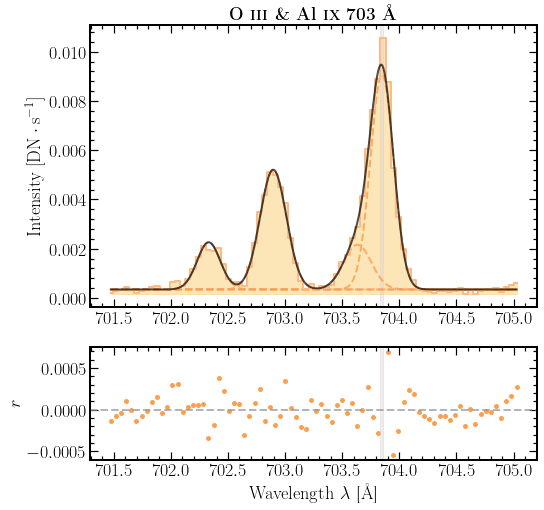

In [120]:
OIII_AlIX_slice = (660,740)
wvl_OIII_AlIX = wvl_338[OIII_AlIX_slice[0]:OIII_AlIX_slice[1]]
int_OIII_AlIX = np.average(sumer_338_window[-30:,OIII_AlIX_slice[0]:OIII_AlIX_slice[1]],axis=0)

def OIII_AlIX_fit_func(wvl,int1,int2,int3,int4,wvl1,wvl2,wvl3,fwhm1,fwhm2,fwhm3,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,int2,fwhm2) + \
            gaussian(wvl,wvl3,int3,fwhm3) + gaussian(wvl,wvl1+703.8540-702.3370,int4,fwhm1) + int_cont
OIII_AlIX_fit_model = SpectrumFitSingle(data=int_OIII_AlIX,wvl=wvl_OIII_AlIX,err=None,
                                      custom_func=OIII_AlIX_fit_func,custom_init=[0.002,0.005,0.003,0.01,702.2,702.9,703.5,0.2,0.2,0.2,0],
                                      mask=[[703.83,703.86]])
#OIII_AlIX_fit_model.plot(plot_fit=False,plot_params=False)
OIII_AlIX_fit_model.run_lse(absolute_sigma=False)
ax = OIII_AlIX_fit_model.plot(plot_title=r"\textbf{O \textsc{iii} \& Al \textsc{ix} 703 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                                color_style="Yellow")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[4],
        OIII_AlIX_fit_model.custom_fit[0],OIII_AlIX_fit_model.custom_fit[7])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[5],
        OIII_AlIX_fit_model.custom_fit[1],OIII_AlIX_fit_model.custom_fit[8])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[6],
        OIII_AlIX_fit_model.custom_fit[2],OIII_AlIX_fit_model.custom_fit[9])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[4]+703.8540-702.3370,
        OIII_AlIX_fit_model.custom_fit[3],OIII_AlIX_fit_model.custom_fit[7])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
        
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,np.concatenate((OIII_AlIX_fit_model.custom_fit[4:7],OIII_AlIX_fit_model.custom_fit[4]+703.8540-702.3370),axis=None),
1,np.concatenate((OIII_AlIX_fit_model.custom_fit[7:10],OIII_AlIX_fit_model.custom_fit[7]),axis=None)*1000,DET_B=True))

In [124]:
print(OIII_AlIX_fit_model.custom_fit[6])
print(OIII_AlIX_fit_model.custom_fit[9])
print(OIII_AlIX_fit_model.custom_err[9])

703.634506761385
0.2849727357919666
0.054199807450535355


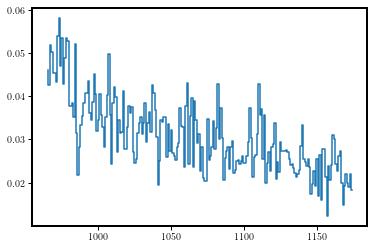

In [118]:
OIII_slice = (660,699)
wvl_OIII = wvl_338[OIII_slice[0]:OIII_slice[1]]
int_OIII = np.sum(sumer_338_window[-210:,OIII_slice[0]:OIII_slice[1]],axis=1) - \
     39*np.average(sumer_338_window[-210:,OIII_slice[0]:OIII_slice[0]+10],axis=1)
plt.step(np.flip(sumer_ycoord[:210]),int_OIII,where="mid")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [215.19]


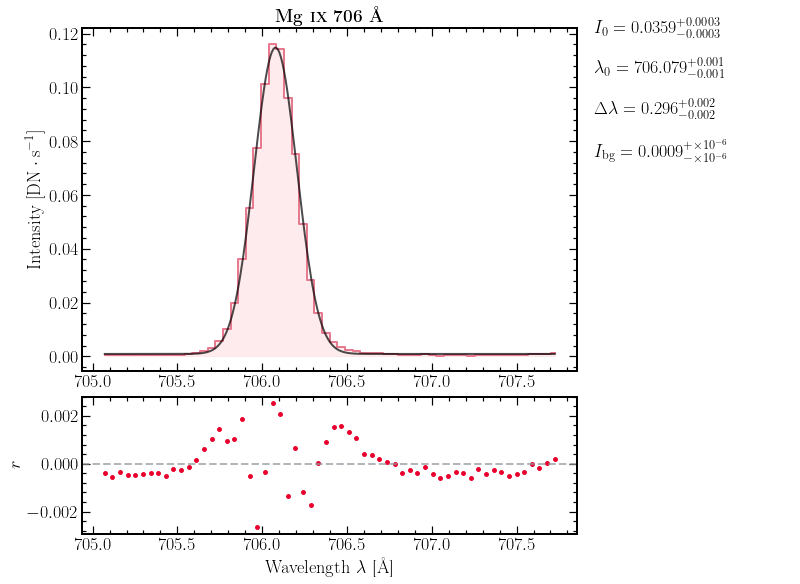

In [62]:
MgIX_706_slice = (740,800)
wvl_MgIX_706 = wvl_338[MgIX_706_slice[0]:MgIX_706_slice[1]]
int_MgIX_706 = np.average(sumer_338_window[-30:,MgIX_706_slice[0]:MgIX_706_slice[1]],axis=0)

MgIX_706_fit_model = SpectrumFitSingle(data=int_MgIX_706,wvl=wvl_MgIX_706,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[706.1],
                                      int_max_init=[0.12],fwhm_init=[0.2])
#MgIX_706_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_706_fit_model.run_HahnMC(n_chain=10000)
MgIX_706_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} 706 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgIX_706_fit_model.line_wvl_fit,1,MgIX_706_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


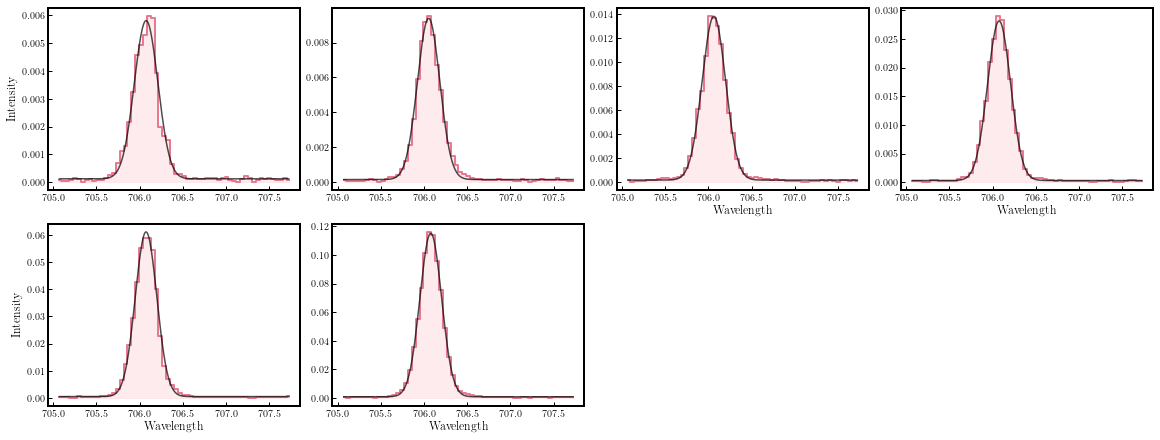

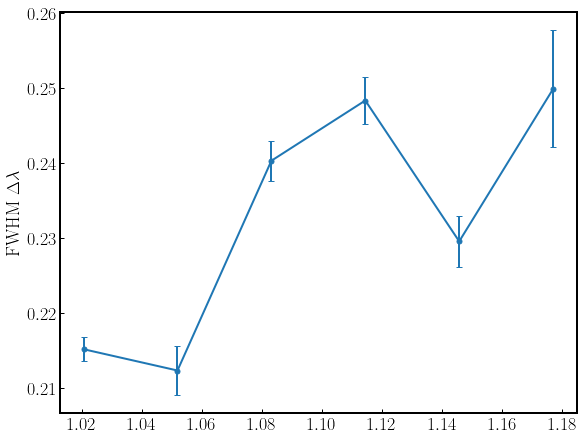

In [110]:
int_MgIX_706_row = np.average(sumer_338_window[-180:,MgIX_706_slice[0]:MgIX_706_slice[1]].reshape(-1,30,MgIX_706_slice[1]-MgIX_706_slice[0]),axis=1)

MgIX_706_fit_row_model = SpectrumFitRow(data=int_MgIX_706_row,wvl=wvl_MgIX_706,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[706.1],
                                      int_max_init=[0.12],fwhm_init=[0.2])
MgIX_706_fit_row_model.run_lse()
MgIX_706_fit_row_model.plot_fit()
MgIX_706_fit_row_model.fwhm_fit = con_width_funct_4(1,MgIX_706_fit_row_model.line_wvl_fit,1, MgIX_706_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
MgIX_706_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:180].reshape(-1,30),axis=1))/960)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [179.59]


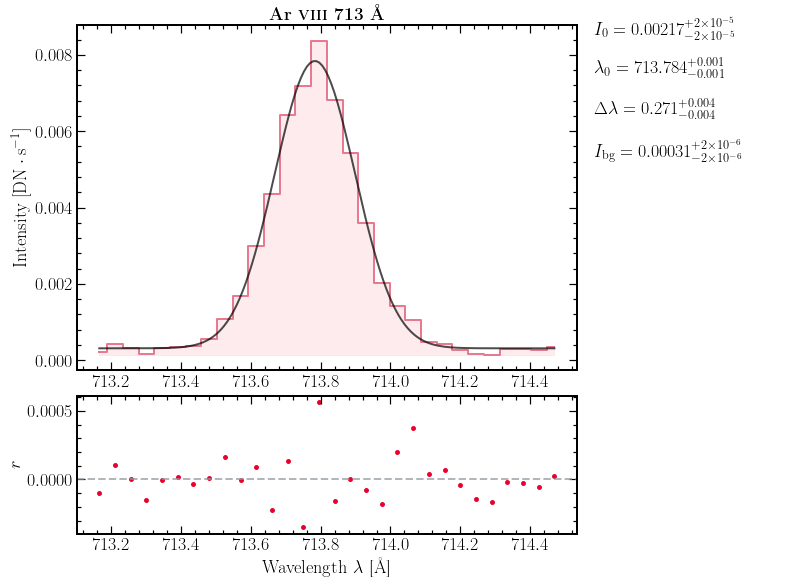

In [63]:
ArVIII_713_slice = (920,950)
wvl_ArVIII_713 = wvl_338[ArVIII_713_slice[0]:ArVIII_713_slice[1]]
int_ArVIII_713 = np.average(sumer_338_window[-30:,ArVIII_713_slice[0]:ArVIII_713_slice[1]],axis=0)

ArVIII_713_fit_model = SpectrumFitSingle(data=int_ArVIII_713,wvl=wvl_ArVIII_713,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[713.8],
                                      int_max_init=[0.008],fwhm_init=[0.2])
#ArVIII_713_fit_model.plot(plot_fit=False,plot_params=False)
ArVIII_713_fit_model.run_HahnMC(n_chain=10000)
ArVIII_713_fit_model.plot(plot_title=r"\textbf{Ar \textsc{viii} 713 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,ArVIII_713_fit_model.line_wvl_fit,1,ArVIII_713_fit_model.fwhm_fit*1000,DET_B=True))